In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data_diseased = {
    ("CD", "UC"): 0.27,("CD", "PD"): 0.12,("CD", "T2D"): 0.15,("CD", "CRC"): 0.17,("CD", "Schizophrenia"): 0.09,("CD", "AD"): 0.01,
    ("UC", "PD"): 0.11,("UC", "T2D"): 0.03,("UC", "CRC"): 0.1,("UC", "Schizophrenia"): 0.01,("UC", "AD"): 0.01,
    ("PD", "T2D"): 0.23,("PD", "CRC"): 0.1,("PD", "Schizophrenia"): 0.09,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.06,("T2D", "Schizophrenia"): 0.09,("T2D", "AD"): 0.05,
    ("CRC", "Schizophrenia"): 0.11,("CRC", "AD"): 0.06,
    ("Schizophrenia", "AD"): 0.08
}

similarity_data_healthy = {
    ("CD", "UC"): 0.18,("CD", "PD"):0.07,("CD", "T2D"):0.04,("CD", "CRC"): 0.12,("CD", "Schizophrenia"):0.06,("CD", "AD"):0.03,
    ("UC", "PD"): 0.1,("UC", "T2D"): 0.01,("UC", "CRC"): 0.07,("UC", "Schizophrenia"): 0.08,("UC", "AD"): 0.02,
    ("PD", "T2D"): 0.12,("PD", "CRC"): 0.07,("PD", "Schizophrenia"): 0.06,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.13,("T2D", "Schizophrenia"): 0.2,("T2D", "AD"): 0.03,
    ("CRC", "Schizophrenia"): 0.02,("CRC", "AD"): 0.09,
    ("Schizophrenia", "AD"): 0.01
}

# Create graphs
G_diseased = nx.Graph()
G_healthy = nx.Graph()

# Add nodes and edges with similarity scores as weights
for G, similarity_data, edge_color in zip([G_diseased, G_healthy], [similarity_data_diseased, similarity_data_healthy], ['salmon', 'skyblue']):
    nodes = set(node for edge in similarity_data.keys() for node in edge)
    G.add_nodes_from(nodes)
    for edge, similarity in similarity_data.items():
        G.add_edge(edge[0], edge[1], weight=similarity, color=edge_color)

# Combine edges from both graphs
combined_edges = set(G_diseased.edges()) | set(G_healthy.edges())

# Create a new graph for the combined network
G_combined = nx.Graph()

# Add nodes
G_combined.add_nodes_from(G_diseased.nodes)

# Add edges with weights as the sum of weights from G_diseased and G_healthy
for u, v in combined_edges:
    weight_diseased = G_diseased[u][v]['weight'] if G_diseased.has_edge(u, v) else 0
    weight_healthy = G_healthy[u][v]['weight'] if G_healthy.has_edge(u, v) else 0
    G_combined.add_edge(u, v, weight=weight_diseased + weight_healthy)

# Define edge widths based on the sum of similarity scores
edge_weights_combined = [data['weight'] for _, _, data in G_combined.edges(data=True)]
edge_widths_combined = [w * 15 for w in edge_weights_combined]  # Adjust the scaling factor as needed

# Define positions of the nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G_combined)

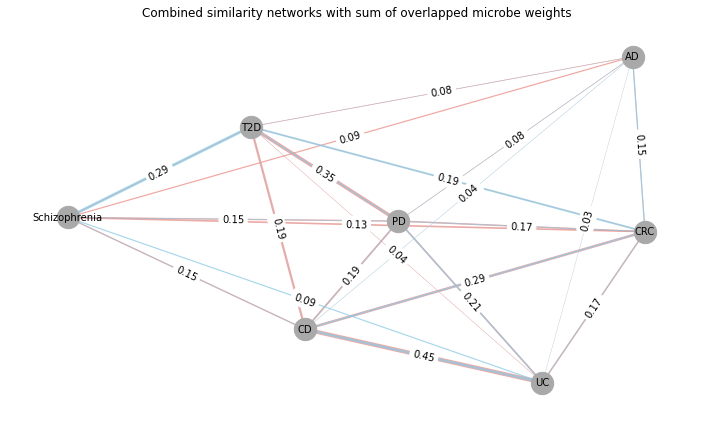

In [23]:
# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=500, node_color='darkgray', ax=ax)
nx.draw_networkx_labels(G_combined, pos, font_size=10, ax=ax)

# Draw edges for G_diseased
nx.draw_networkx_edges(
    G_diseased,
    pos,
    edgelist=G_diseased.edges(),
    width=[w * 15 for w in nx.get_edge_attributes(G_diseased, 'weight').values()],  # Adjust the scaling factor as needed
    edge_color='salmon',
    alpha=0.7,
    ax=ax
)

# Draw edges for G_healthy
nx.draw_networkx_edges(
    G_healthy,
    pos,
    edgelist=G_healthy.edges(),
    width=[w * 15 for w in nx.get_edge_attributes(G_healthy, 'weight').values()],  # Adjust the scaling factor as needed
    edge_color='skyblue',
    alpha=0.7,
    ax=ax
)

# Draw edge labels with custom font color
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
edge_labels_combined = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels_combined.items()}
nx.draw_networkx_edge_labels(G_combined, pos, edge_labels=edge_labels_combined, font_size=10, font_color='black', ax=ax)

ax.set_title('Combined similarity networks with sum of overlapped microbe weights')
ax.axis('off')  # Turn off axis labels


plt.tight_layout()
plt.savefig("combined_similarity_networks_sum_weights_colored.pdf", format="pdf", bbox_inches="tight")